# 課題2-1: 一元分散分析

A社は、エタノールを製造・販売しています。5本の製造ラインがありますが、これらのラインにより製品の濃度に差がないかどうかを確認したく思います。5本のライン(A, B, C, D, E)から10回ずつサンプリングを行い測定を行った結果が *dataset/data1.csv* です（データ数の合計：50件）。このデータを一元分散分析にて解析し、結論を出してみましょう。なお、有意水準は5％とします。

レッスン7までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。

## 1. 必要なモジュールの読み込み

In [20]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## 2. データの読み込み

In [21]:
# データを読み込んで変数 data に格納
data = pd.read_csv('dataset/data1.csv')

In [22]:
# データの最初の5行だけ表示
data.head()

,Density,Line
0,71.624345,A
1,69.388244,A
2,69.471828,A
3,68.927031,A
4,70.865408,A


## 3. データ内容の把握

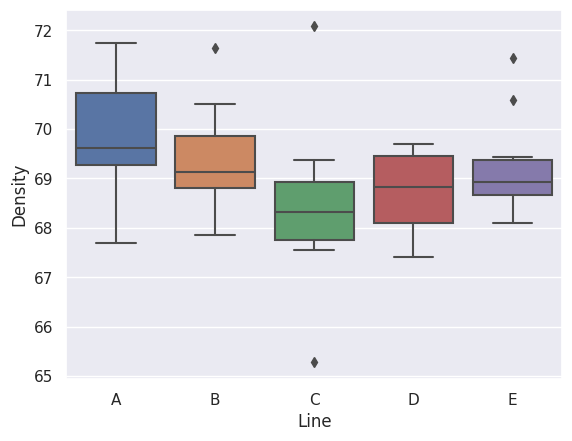

In [23]:
# （データ数が多くはないので）箱髭図にて製造ラインごとの濃度を表示
sns.boxplot(x='Line', y='Density', data=data)

## 4. 分散分析

ここでは理解を深めるために手動で計算して理解を深めましょう。

### 4-1. 効果・誤差の平方和の計算

In [24]:
# ラインの持つ影響（ラインによる影響を考えた場合の濃度）
# 各ラインの濃度の平均値を計算し、それぞれを連結して リストとして格納
me_Line_A = np.mean(data.query('Line == "A"')['Density'])
me_Line_B = np.mean(data.query('Line == "B"')['Density'])
me_Line_C = np.mean(data.query('Line == "C"')['Density'])
me_Line_D = np.mean(data.query('Line == "D"')['Density'])
me_Line_E = np.mean(data.query('Line == "E"')['Density'])
print('Line A:', me_Line_A)
print('Line B:', me_Line_B)
print('Line C:', me_Line_C)
print('Line D:', me_Line_D)
print('Line E:', me_Line_E)

# 全体の平均
mu_all = np.mean(data['Density'])
mu_all

Line A: 69.9028591091939
Line B: 69.36865005840153
Line C: 68.42904350984494
Line D: 68.73809656689362
Line E: 69.23379915563066


69.13448967999292

In [33]:
#　効果の平方和を求める
mu_n = [69.903]*10 + [69.369]*10 + [68.429]*10 + [68.738]*10 + [69.234]*10
mu_n = np.array(mu_n)

effect = mu_n - mu_all

squares_model = np.sum(effect**2)
squares_model

13.10425260852525

In [30]:
#　誤差を求める
resid = data['Density'] - mu_n
resid

0     1.721345
1    -0.514756
2    -0.431172
3    -0.975969
4     0.962408
5    -2.204539
6     1.841812
7    -0.664207
8     0.416039
9    -0.152370
10    0.214242
11    0.574733
12   -1.505196
13    2.271271
14   -1.162436
15   -0.210747
16    1.133881
17   -0.614288
18   -0.426952
19   -0.278008
20    3.648257
21    0.944020
22    0.263995
23   -3.155985
24   -0.483776
25   -0.638518
26    0.505517
27   -0.683001
28    0.483364
29   -0.883436
30    0.312562
31    0.761951
32   -0.733909
33    0.955599
34   -0.156302
35   -1.322577
36   -0.385707
37    0.860575
38    0.594250
39   -0.885477
40    0.207227
41   -0.564870
42    2.196771
43   -0.486092
44   -0.124390
45    1.348481
46   -1.143232
47   -0.825637
48   -0.046397
49   -0.563870
Name: Density, dtype: float64

In [29]:
#　誤差の平方和を求める
squares_resid = np.sum(resid**2)
squares_resid

67.40695505144132

### 4-2. 効果・誤差の分散の計算

In [32]:
 # 効果の自由度を変数 df_model に格納し、誤差の自由度を変数 df_resid に格納する
df_model = 4
df_resid = 45

In [35]:
# 効果の分散を求める
variance_model= squares_model/df_model
variance_model

3.2760631521313126

In [36]:
# 誤差の分散を求める
variance_resid = squares_resid/df_resid
variance_resid

1.4979323344764737

### 4-3. p値の計算

In [37]:
# F比を求める
f_ratio = variance_model/variance_resid
f_ratio

2.1870568360995386

In [38]:
# p値を求めて、表示する
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.08563993704295836

## 5. Statsmodelsによる分散分析

実務ではStatsmodelsを使って実行していくことになります。次に、Statsmodelsのパッケージを用いて計算してみましょう。

In [39]:
# 最小二乗法を使ってモデルを作成
anova_model = smf.ols('Density ~ Line', data=data).fit()

In [42]:
# Statsmodelsの関数で分散分析を実行し、結果を表示
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
Line,13.098668,4.0,2.186125,0.08575
Residual,67.406953,45.0,NaN,NaN


手動で計算した場合と結果は一致しましたか？

## 6. 結果の解釈

ラインによって、製品の濃度は「 有意差があるとは言い切れない」と判断できる（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）

*補足：有意差がみられた場合、これは化学メーカーとしては問題ですので製造ラインの詳細を確認する必要があります。*